In [ ]:
Web Scraping Script: Google Play Store Reviews for Ethiopian Banks

Objective:
-----------
This script scrapes user reviews from the Google Play Store for three major Ethiopian banks:
- Commercial Bank of Ethiopia (CBE)
- Bank of Abyssinia (BOA)
- Dashen Bank

It uses the `google-play-scraper` library to collect:
    - Review text
    - Rating (1–5)
    - Review date
    - Associated bank name
    - Data source

In [23]:
from google_play_scraper import Sort, reviews
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

Scraping reviews for CBE (App ID: com.combanketh.mobilebanking)
Fetched 200 reviews for CBE so far...
Fetched 400 reviews for CBE so far...
Collected 400 reviews for CBE
Scraping reviews for BOA (App ID: com.boa.boaMobileBanking)
Fetched 200 reviews for BOA so far...
Fetched 400 reviews for BOA so far...
Collected 400 reviews for BOA
Scraping reviews for Dashen (App ID: com.cr2.amolelight)
Fetched 200 reviews for Dashen so far...
Fetched 400 reviews for Dashen so far...
Collected 400 reviews for Dashen
Saved all reviews to 'data/raw_reviews.csv'


C:\Users\user\AppData\Local\Temp\ipykernel_16992\1293742912.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x='bank', palette='viridis')


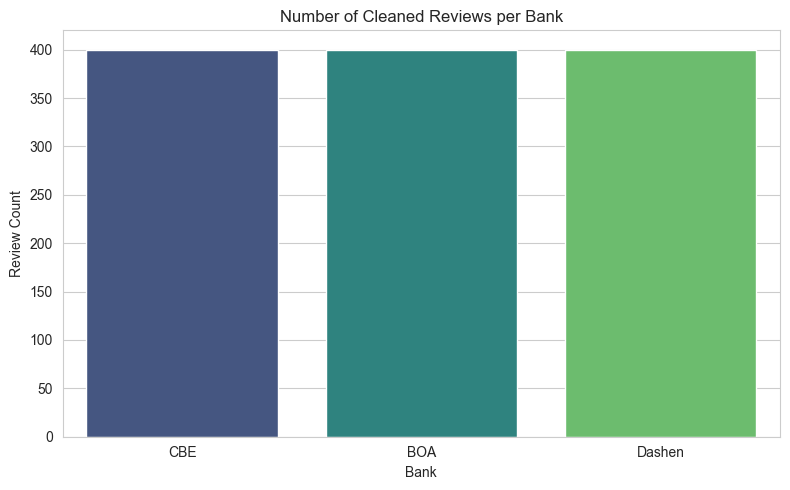

In [24]:
def fetch_reviews(app_id, bank_name, total_count=400):
    all_reviews = []
    count_per_call = 200  # max reviews per single call is usually 200
    next_pagination_token = None

    while len(all_reviews) < total_count:
        count = min(count_per_call, total_count - len(all_reviews))
        result, next_pagination_token = reviews(
            app_id,
            lang='en',
            country='us',
            sort=Sort.NEWEST,
            count=count,
            continuation_token=next_pagination_token
        )
        if not result:
            print(f"No more reviews returned for {bank_name}")
            break
        all_reviews.extend(result)
        print(f"Fetched {len(all_reviews)} reviews for {bank_name} so far...")
        time.sleep(1)  # Be polite to avoid rate limits

        if not next_pagination_token:
            break  # No more pages
    
    df = pd.DataFrame(all_reviews)
    # Select relevant columns
    df = df[['content', 'score', 'at']]
    df.columns = ['review', 'rating', 'date']
    df['bank'] = bank_name
    df['source'] = 'Google Play'
    return df

def main():
    apps = {
        'com.combanketh.mobilebanking': 'CBE',
        'com.boa.boaMobileBanking': 'BOA',
        'com.cr2.amolelight': 'Dashen'
    }

    all_dfs = []
    for app_id, bank in apps.items():
        print(f"Scraping reviews for {bank} (App ID: {app_id})")
        df = fetch_reviews(app_id, bank, total_count=400)
        print(f"Collected {len(df)} reviews for {bank}")
        all_dfs.append(df)

    combined_df = pd.concat(all_dfs, ignore_index=True)
    combined_df.to_csv('../data/raw_reviews.csv', index=False)
    print("Saved all reviews to 'data/raw_reviews.csv'")
    #os.makedirs("data", exist_ok=True)
        # 📊 Plotting number of reviews per bank
    plt.figure(figsize=(8, 5))
    sns.set_style("whitegrid")
    sns.countplot(data=combined_df, x='bank', palette='viridis')

    plt.title('Number of Cleaned Reviews per Bank')
    plt.xlabel('Bank')
    plt.ylabel('Review Count')
    plt.tight_layout()
    plt.savefig("../data/review_counts_per_bank.png")  # optional: save the plot
    plt.show()

if __name__ == "__main__":
    main()
